Importing the libraries

In [226]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)

Loading the data

In [227]:
data = pd.read_csv(r'D:\Interproject\Email Spam Detection With Machine Learning\spam.csv',encoding="latin1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [228]:
data.shape

(5572, 5)

This data contain 5572 rows and 5 columns

In [229]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

As we can see only 2 to 4% data is filled so we will drop Unnamed: 2, Unnamed: 3, Unnamed: 4.

In [230]:
print(data.shape)
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)
data.shape

(5572, 5)


(5572, 2)

In [231]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Renaming the column name

In [232]:
data.columns=['Category','Message']
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [233]:
data.describe(include='all')

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [234]:
data.shape

(5572, 2)

In [235]:
data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

Converting the text to numeric value

In [236]:
#Convert the category column values to numerical representation(0 for 'spam' and 1 for 'ham')

data.loc[data['Category'] == 'spam', 'Category'] = 0
data.loc[data['Category'] == 'ham', 'Category'] = 1

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

Spliting the data

In [238]:
X = data['Message']
Y = data['Category']

In [239]:
X = feature_extraction.fit_transform(X)

In [240]:
print(X)

  (0, 8026)	0.19609779550499865
  (0, 1051)	0.3509649021061901
  (0, 3494)	0.16470488207184114
  (0, 1994)	0.2964965675440533
  (0, 1701)	0.33503393550839805
  (0, 4349)	0.2964965675440533
  (0, 8227)	0.23740046706740073
  (0, 3534)	0.19387320529717864
  (0, 1703)	0.2964965675440533
  (0, 1271)	0.2625103008882829
  (0, 2271)	0.27179815735762314
  (0, 5741)	0.2745089285415426
  (0, 4224)	0.3509649021061901
  (1, 5369)	0.5465881710238072
  (1, 8134)	0.4316010362639011
  (1, 4192)	0.5236458071582338
  (1, 4385)	0.4082988561907181
  (1, 5343)	0.27211951321382544
  (2, 77)	0.23759715224911548
  (2, 1128)	0.1707825659976717
  (2, 6062)	0.1707825659976717
  (2, 7701)	0.12576907263059747
  (2, 7028)	0.1989696587085652
  (2, 6010)	0.1808417865094903
  (2, 6115)	0.16914304332607796
  :	:
  (5567, 5118)	0.2445888397614688
  (5567, 8202)	0.19074118816829963
  (5567, 2000)	0.185955090206136
  (5567, 5894)	0.19532744699307247
  (5567, 6062)	0.23098372602432177
  (5568, 2907)	0.6005703500933404
  (55

In [241]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data in train and test for model building

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [243]:
X

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

Checking the Y variable to be in int variable

In [244]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [245]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572, 8404)
(3900, 8404)
(1672, 8404)
(3900,)
(1672,)


Model Building

Logistic Regression

In [246]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,Y_train)

LogisticRegression()

In [247]:
Y_pred = model.predict(X_test)

In [248]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 147   79]
 [   1 1445]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.65      0.79       226
           1       0.95      1.00      0.97      1446

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.88      1672
weighted avg       0.95      0.95      0.95      1672

Accuracy of the model:  0.9521531100478469


Base Logistic Regression got the accuracy of 95%

Testing the model based on some random email

In [249]:
# Test the model with some custom email messages

input_your_mail = ["Congratulations! You have won a free vacation to an exotic destination. Click the link to claim your prize now!"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)


# Print the prediction result

if (prediction)[0] == True:
  print("Ham Mail")
else:
  print("Spam Mail")

[0]
Spam Mail


In [250]:
input_your_mail = ["Meeting reminder: Tomorrow, 10 AM, conference room. See you there!"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)


# Print the prediction result

if (prediction)[0] == True:
  print("Ham Mail")
else:
  print("Spam Mail")

[1]
Ham Mail


ROC curve based on base Logistic Regression

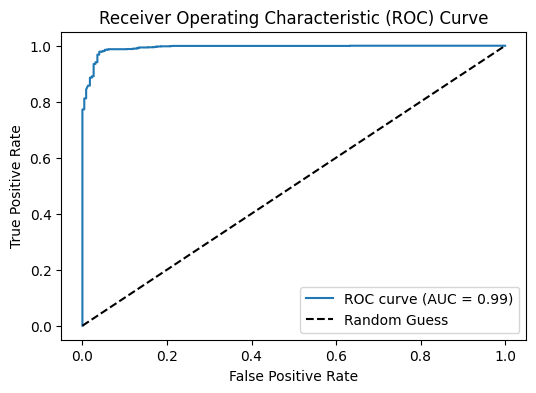

In [251]:
from sklearn.metrics import roc_curve, roc_auc_score

probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)
roc_auc = roc_auc_score(Y_test, probabilities)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Performing Smote to cover the unbalanced data to a balanced data

Here we are doing the oversampling technique <br>
As our 0 class had only 521 so we will oversample the class 0 to the level of class 1

In [252]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  3379
Before OverSampling, counts of label '0':  521
After OverSampling, the shape of train_X:  (6758, 8404)
After OverSampling, the shape of train_y:  (6758,)
After OverSampling, counts of label '1':  3379
After OverSampling, counts of label '0':  3379


In [253]:
model.fit(X_train_res, Y_train_res)
  
Y_pred = model.predict(X_test)

In [254]:
# print classification report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[ 199   27]
 [  11 1435]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       226
           1       0.98      0.99      0.99      1446

    accuracy                           0.98      1672
   macro avg       0.96      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672

0.9772727272727273


After doing the oversampling the accuracy level has increased to 97% <br>
Oversampling technique has helped to increase the accuracy by 2 % <br>
As our base model had accuracy of 95%